/home/smalani/Cybernetic


(array([-0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

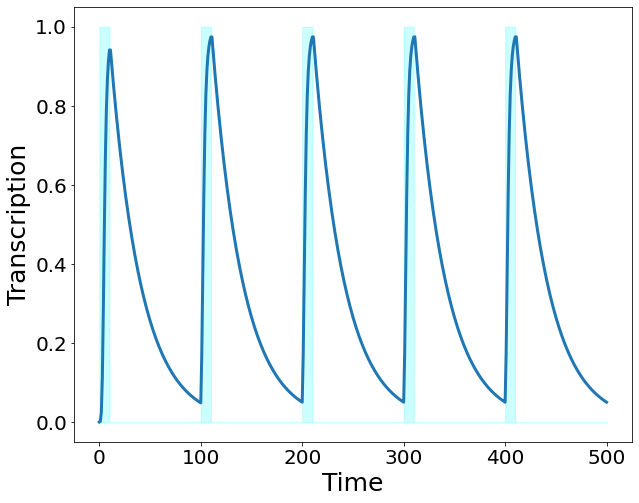

In [1]:
%cd /home/smalani/Cybernetic

from gardner_opto import pulse_integrator
import matplotlib.pyplot as plt
import numpy as np

t_out, act_out, light_out, light_time_out = pulse_integrator(pulse_on=10, pulse_period=100, t_start=0, t_end=500, act_init=0., t_step=1)

zero_line = np.zeros(light_time_out.shape)

plt.figure(figsize=(10,8))
plt.plot(t_out, act_out, linewidth=3)
plt.fill_between(light_time_out, light_out, zero_line, color='cyan', alpha=0.2)
plt.ylabel('Transcription', fontsize=25)
plt.xlabel('Time', fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.ylim([0,1])
# plt.xlim([0,10])

In [2]:
print(act_out[:10])

[0.         0.00159744 0.024961   0.11473088 0.29057889 0.5
 0.67464862 0.79345671 0.86761279 0.91302533]


In [3]:
def myf(var, pulse):
    _, act_out, _, _ = pulse_integrator(pulse_on=pulse, pulse_period=100, t_end=100, act_init=var, t_step=20)
    return act_out[-1] - var

In [4]:
def myf(var, pulse_on, pulse_period):
    _, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, pulse_period=pulse_period, t_end=pulse_period, act_init=var, t_step=pulse_on)
    return act_out[-1] - var

from scipy.optimize import fsolve

pulse_on = 20
pulse_period = 100

x, infodict, ier, mesg = fsolve(myf, 0.5, full_output=True, args=(pulse_on,pulse_period))

print(ier)
print(mesg)
print(x)

1
The solution converged.
[0.13504106]


1
The solution converged.
[0.82440425]
[1.11022302e-16]
0.8552303857609528
-0.028037787029798644


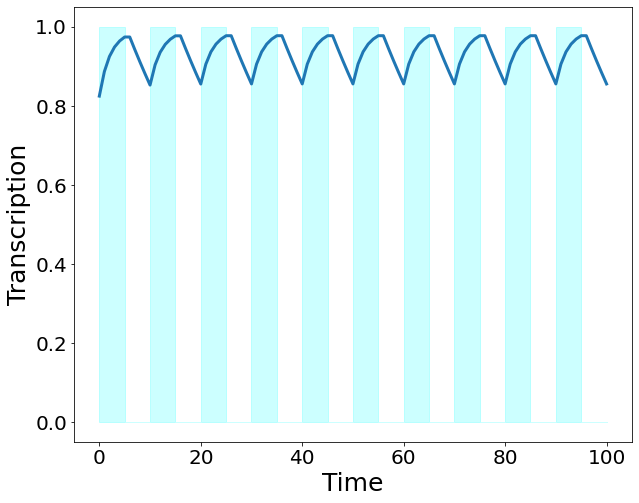

In [21]:
from scipy.optimize import root_scalar
from scipy.optimize import root

def myf_small(var, pulse_on, pulse_period):
    tau_off=30
    tau_on=5
    n=4

    pulse_off = pulse_period - pulse_on

    var_dark = var

    for i in range(1):

        pulse_fun = lambda x: (x ** n) / (x ** n + tau_on ** n) - var_dark
        # t_status = fsolve(pulse_fun, 0) % pulse_period
        sol = root_scalar(pulse_fun, bracket=[0, 100000])
        t_status = sol.root

        var_light = (pulse_on + t_status) ** n / ((pulse_on + t_status) ** n + tau_on ** n)

        var_dark = var_light * np.exp(-(pulse_off / tau_off))

    return var_dark - var

from scipy.optimize import fsolve

pulse_on = 5
pulse_period = 10

x, infodict, ier, mesg = fsolve(myf_small, 0.9, full_output=True, args=(pulse_on,pulse_period))

print(ier)
print(mesg)
print(x)
print(myf_small(x,pulse_on,pulse_period))

t_out, act_out, light_out, light_time_out = pulse_integrator(pulse_on=pulse_on, pulse_period=pulse_period, t_start=0, t_end=pulse_period*10, act_init=x, t_step=1, verbose=True)

print('=================')
print(act_out[-1])
print(myf_small(act_out[-1],pulse_on,pulse_period))

In [ ]:
t_main, act_main, lightout_main, lighttimeout_main = [], [], [], []

t_out, act_out, light_out, light_time_out = pulse_integrator(t_end=100, pulse_on=0)
t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=100,
                                  act_init=act_out[-1])
t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=10,
                                  act_init=act_out[-1])

t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=0,
                                  act_init=act_out[-1])

t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=20,
                                  act_init=act_out[-1])
t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=0,
                                  act_init=act_out[-1])

t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=t_out[-1], t_end=t_out[-1]+1000, pulse_on=100,
                                  act_init=act_out[-1])
t_main.append(t_out)
act_main.append(act_out)
lightout_main.append(light_out)
lighttimeout_main.append(light_time_out)

In [ ]:
# t_out, act_out, light_out, light_time_out = pulse_integrator(t_start=1000, t_end=2000, pulse_on=10,
#                                   act_init=0.05)

# plt.figure()
# plt.plot(t_out, act_out)

In [ ]:
import numpy as np

t_main = np.concatenate(t_main)
act_main = np.concatenate(act_main)

lighttimeout_main = np.concatenate(lighttimeout_main)
lightout_main = np.concatenate(lightout_main)


print(t_main.shape)
print(act_main.shape)

t_MA = np.zeros(t_main[100:].shape)
act_MA = np.zeros(t_main[100:].shape)

for i in range(100):
    act_MA += act_main[i:-100+i]
act_MA = act_MA / 100

In [ ]:
import matplotlib.pyplot as plt

index1 = 0
index2 = 10000
zero_line = np.zeros(lighttimeout_main.shape)

plt.figure(figsize=(30,15))
plt.plot((t_main/3600)[index1:index2], (act_main)[index1:index2])
# plt.plot(((t_main-100)/3600)[index1:index2], (act_main)[index1:index2])
plt.plot((t_main[100:]/3600)[index1:index2], (act_MA)[index1:index2])
plt.fill_between((lighttimeout_main/3600), lightout_main, zero_line, color='cyan', alpha=0.2)

In [ ]:
def average_transcription(pulse_on, pulse_period, act_init=0.5, ss_length=1000):
    _, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, pulse_period=pulse_period, t_end=ss_length, act_init=act_init, t_step=pulse_on/10)
    _, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, pulse_period=pulse_period, t_end=ss_length, act_init=act_out[-1], t_step=pulse_on/100)
    return np.mean(act_out)


pulse_on = 10
pulse_period = 100

trans_perc = average_transcription(pulse_on, pulse_period)

print(trans_perc)

In [ ]:
def ode_fun(t, var, pulse_on, pulse_period):
    tau_off=30
    tau_on=5

    target = average_transcription(pulse_on, pulse_period)

    if target > var:
        return (target - var) / tau_on
    else:
        return (target - var) / tau_off

In [ ]:
tspan = [0,100]
pulse_on = 0
pulse_period = 100



In [ ]:
from scipy.optimize import root_scalar

def solve_periodic(var, pulse_on, pulse_period):
    tau_off=30
    tau_on=5
    n=4

    pulse_off = pulse_period - pulse_on

    var_dark = var

    for i in range(1):

        pulse_fun = lambda x: (x ** n) / (x ** n + tau_on ** n) - var_dark
        sol = root_scalar(pulse_fun, bracket=[0, np.inf])
        t_status = sol.root

        var_light = (pulse_on + t_status) ** n / ((pulse_on + t_status) ** n + tau_on ** n)

        var_dark = var_light * np.exp(-(pulse_off / tau_off))

    return var_dark - var


pulse_period = 14.38449888287663
pulse_on = pulse_period / 1
act_init = 0.9999999985598428

x, infodict, ier, mesg = fsolve(solve_periodic, act_init, full_output=True, args=(pulse_on,pulse_period))

_, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, 
                                        pulse_period=pulse_period, 
                                        t_end=pulse_period*2, 
                                        act_init=x, 
                                        t_step=0.01,
                                        verbose=True)

t_out, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, 
                                        pulse_period=pulse_period, 
                                        t_end=pulse_period*10, 
                                        act_init=act_out[-1], 
                                        t_step=0.01,
                                        verbose=True)

                                        

print(x)
print(ier)
print(mesg)

plt.figure()
plt.plot(t_out, act_out)

In [ ]:
def average_transcription(pulse_on, pulse_period, act_init=0.5, ss_length=1000):

    x, infodict, ier, mesg = fsolve(solve_periodic, act_init, full_output=True, args=(pulse_on,pulse_period))

    # print(x)
    # print(ier)
    # print(mesg)
    
    if pulse_on > 0:
        tstep = np.min([pulse_on/100,
                        pulse_period/1000])
    else:
        tstep = pulse_period/1000

    # if ier != 1:
    #     print('FAILED AT pulse_on: ' + str(pulse_on) + ', pulse_period: ' + str(pulse_period))
    #     print(x)
    #     print(ier)
    #     print(mesg)

        # _, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, 
        #                                     pulse_period=pulse_period, 
        #                                     t_end=pulse_period*10, 
        #                                     act_init=x, 
        #                                     t_step=tstep,
        #                                     verbose=True)
        # assert False

    _, act_out, _, _ = pulse_integrator(pulse_on=pulse_on, 
                                        pulse_period=pulse_period, 
                                        t_end=pulse_period*10, 
                                        act_init=x, 
                                        t_step=tstep,
                                        verbose=False)
    return np.mean(act_out)

out = average_transcription(pulse_on=2,
                              pulse_period=10, 
                              act_init=0.5, 
                              ss_length=10000,
                              )

print(out)

In [ ]:
# Grid Search

pulse_perc = 10 ** np.linspace(-2,0, 20)
pulse_period = 10 ** np.linspace(1,4,20)
# pulse_period = np.array([10, 20, 50, 100, 200, 500, 1000, 2000, 5000, 10000])

ave_trans = np.zeros((len(pulse_perc), len(pulse_period)))
initial = np.zeros(len(pulse_perc)) + 0.5

total = len(pulse_period) * len(pulse_perc)
count = 0
for j in range(len(pulse_period)):
    for i in range(len(pulse_perc)):
        try:
            out = average_transcription(pulse_on=pulse_perc[i]*pulse_period[j],
                              pulse_period=pulse_period[j], 
                              act_init=initial[i], 
                              ss_length=np.max([pulse_period[j]*10,1000]),
                              )
        except BaseException as err:
            print(err)
            print('Error occured at pulse period: ' + str(pulse_period[j]) + ', pulse_perc: ' + str(pulse_perc[i]))
            print(initial[i])
            raise

        initial[i] = out
        ave_trans[i,j] = out
        count += 1
        perc = count/total * 100
        if count % 10 == 0:
            print(perc)


In [ ]:
from matplotlib import cm

# ave_trans = np.zeros((len(pulse_perc), len(pulse_period)))

X, Y = np.meshgrid(pulse_perc, pulse_period)
Z = ave_trans.T

print(X.shape)
print(Y.shape)
print(Z.shape)

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(30,15))
surf = ax.plot_surface(np.log(X), np.log(Y), Z, cmap=cm.coolwarm,
                       linewidth=0)
plt.xlabel('Pulsing %', fontsize=30)
plt.ylabel('Pulsing Period', fontsize=30)

ax.set_xticks(np.log(pulse_perc)[[0,5,10,15,-1]])
ax.set_xticklabels(labels=(pulse_perc*100).round(3)[[0,5,10,15,-1]], fontsize=20)
ax.set_yticks(np.log(pulse_period)[[0,5,10,15,-1]])
ax.set_yticklabels(labels=pulse_period.round(-1)[[0,5,10,15,-1]], fontsize=20)

ax.view_init(30, 120)
# ax.yaxis.set_scale('log')

print(pulse_perc)



In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

plt.xlabel('Pulsing %', fontsize=30)
plt.ylabel('Pulsing Period', fontsize=30)

plt.contourf(np.log(X),np.log(Y),Z, cmap=cm.coolwarm)
ax.set_xticks(np.log(pulse_perc)[[0,5,10,15,-1]])
ax.set_xticklabels(labels=(pulse_perc*100).round(3)[[0,5,10,15,-1]], fontsize=20)
ax.set_yticks(np.log(pulse_period)[[0,5,10,15,-1]])
ax.set_yticklabels(labels=pulse_period.round(-1)[[0,5,10,15,-1]], fontsize=20)
plt.colorbar()

In [ ]:
plt.imshow(Z , cmap = 'autumn' , interpolation = 'nearest' )
  
plt.title( "2-D Heat Map" )
plt.show()